In [1]:
%matplotlib inline

import importlib
import numpy as np
import scipy as sp
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D
from Brownian import *

In [2]:
N = 10000
l = 0.1
dt = 0.1
Nt = 100
test = Brownian(N,l,dt)
testInt = TimeIntegrator(test,Nt)
testQoI = QoI(testInt)

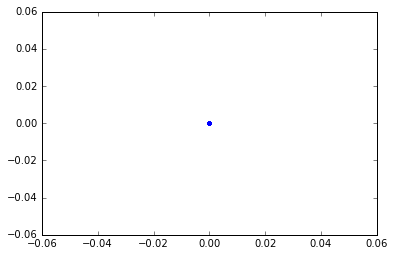

In [3]:
plt.plot(test.x,test.y,'.')

(array([[ 0.,  0.,  0., ...,  0.,  0.,  0.],
        [ 0.,  0.,  0., ...,  0.,  0.,  0.],
        [ 0.,  0.,  0., ...,  0.,  0.,  0.],
        ..., 
        [ 0.,  0.,  0., ...,  0.,  0.,  0.],
        [ 0.,  0.,  0., ...,  0.,  0.,  0.],
        [ 0.,  0.,  0., ...,  0.,  0.,  0.]]),
 array([-0.5 , -0.48, -0.46, -0.44, -0.42, -0.4 , -0.38, -0.36, -0.34,
        -0.32, -0.3 , -0.28, -0.26, -0.24, -0.22, -0.2 , -0.18, -0.16,
        -0.14, -0.12, -0.1 , -0.08, -0.06, -0.04, -0.02,  0.  ,  0.02,
         0.04,  0.06,  0.08,  0.1 ,  0.12,  0.14,  0.16,  0.18,  0.2 ,
         0.22,  0.24,  0.26,  0.28,  0.3 ,  0.32,  0.34,  0.36,  0.38,
         0.4 ,  0.42,  0.44,  0.46,  0.48,  0.5 ]),
 array([-0.5 , -0.48, -0.46, -0.44, -0.42, -0.4 , -0.38, -0.36, -0.34,
        -0.32, -0.3 , -0.28, -0.26, -0.24, -0.22, -0.2 , -0.18, -0.16,
        -0.14, -0.12, -0.1 , -0.08, -0.06, -0.04, -0.02,  0.  ,  0.02,
         0.04,  0.06,  0.08,  0.1 ,  0.12,  0.14,  0.16,  0.18,  0.2 ,
         0.22,  0.24,  

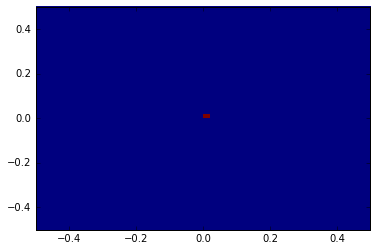

In [4]:
plt.hist2d(test.x,test.y,bins=50)

In [5]:
testInt.forward(test)

In [6]:
# fig = plt.figure()
# ax = fig.add_subplot(111, projection='3d')
# hist, xedges, yedges = np.histogram2d(test.x, test.y, bins=100)

# elements = (len(xedges) - 1) * (len(yedges) - 1)
# xpos, ypos = np.meshgrid(xedges[:-1] + 0.25, yedges[:-1] + 0.25)

# xpos = xpos.flatten()
# ypos = ypos.flatten()
# zpos = np.zeros(elements)
# dx = 0.5 * np.ones_like(zpos)
# dy = dx.copy()
# dz = hist.flatten()

# ax.bar3d(xpos, ypos, zpos, dx, dy, dz, color='b', zsort='average')

# plt.show()

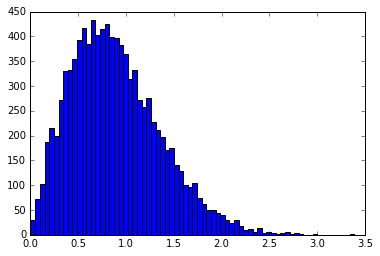

In [7]:
plt.hist(np.sqrt(np.square(test.x)+np.square(test.y)),bins=70)
plt.show()

In [8]:
testQoI.compute_J(testInt)
J0 = testQoI.J
D = l*l/4.0/dt
print J0, 2*D*Nt*dt

0.50499693445 0.5


(array([ 209.,  216.,  191.,  184.,  196.,  188.,  216.,  203.,  219.,
         199.,  181.,  186.,  205.,  202.,  197.,  210.,  188.,  222.,
         195.,  192.,  200.,  212.,  227.,  192.,  223.,  201.,  208.,
         204.,  194.,  184.,  205.,  206.,  184.,  186.,  211.,  206.,
         187.,  212.,  182.,  187.,  208.,  197.,  194.,  189.,  204.,
         191.,  187.,  202.,  219.,  199.]),
 array([  1.81732692e-04,   1.25806407e-01,   2.51431081e-01,
          3.77055756e-01,   5.02680430e-01,   6.28305104e-01,
          7.53929779e-01,   8.79554453e-01,   1.00517913e+00,
          1.13080380e+00,   1.25642848e+00,   1.38205315e+00,
          1.50767782e+00,   1.63330250e+00,   1.75892717e+00,
          1.88455185e+00,   2.01017652e+00,   2.13580120e+00,
          2.26142587e+00,   2.38705054e+00,   2.51267522e+00,
          2.63829989e+00,   2.76392457e+00,   2.88954924e+00,
          3.01517392e+00,   3.14079859e+00,   3.26642326e+00,
          3.39204794e+00,   3.51767261e+00

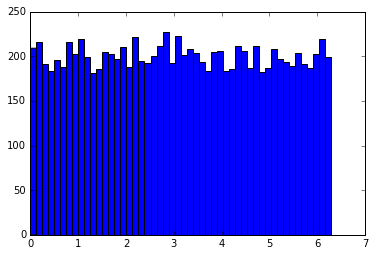

In [9]:
plt.hist(testInt.theta[10,:],bins=50)

In [10]:
testAdj = AdjBrownian(test)
testInt.backward(testAdj,testQoI)

In [11]:
print testQoI.dJdA

10.099938689


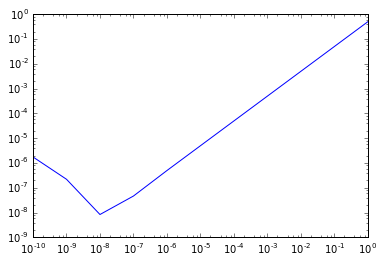

In [12]:
fk = np.linspace(-10.0,0.0,11)
fk = 10.0**fk
ek = np.zeros(11,dtype=np.double)
for i in range( len(fk) ):
    dl=fk[i]*l
    test = Brownian(N,l+dl,dt)
    testInt = TimeIntegrator(test,Nt)
    testInt.forward(test)
    testQoI.compute_J(testInt)
    J1 = testQoI.J
    ek[i] = abs( ((J1-J0)/dl - testQoI.dJdA)/testQoI.dJdA )
plt.loglog(fk,ek)

In [13]:
Nt*l

10.0